In [174]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [175]:
df = pd.read_csv("fastfood.csv")
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515 entries, 0 to 514
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   restaurant   515 non-null    object 
 1   item         515 non-null    object 
 2   calories     515 non-null    int64  
 3   cal_fat      515 non-null    int64  
 4   total_fat    515 non-null    int64  
 5   sat_fat      515 non-null    float64
 6   trans_fat    515 non-null    float64
 7   cholesterol  515 non-null    int64  
 8   sodium       515 non-null    int64  
 9   total_carb   515 non-null    int64  
 10  fiber        503 non-null    float64
 11  sugar        515 non-null    int64  
 12  protein      514 non-null    float64
 13  vit_a        301 non-null    float64
 14  vit_c        305 non-null    float64
 15  calcium      305 non-null    float64
 16  salad        515 non-null    object 
dtypes: float64(7), int64(7), object(3)
memory usage: 68.5+ KB


In [176]:
#verification des na 
print(df.isnull().sum())


restaurant       0
item             0
calories         0
cal_fat          0
total_fat        0
sat_fat          0
trans_fat        0
cholesterol      0
sodium           0
total_carb       0
fiber           12
sugar            0
protein          1
vit_a          214
vit_c          210
calcium        210
salad            0
dtype: int64


In [177]:
df["vit_a"].head()

0     4.0
1     6.0
2    10.0
3     6.0
4     6.0
Name: vit_a, dtype: float64

In [178]:
#imputatiton des Na 
med1 = df.fiber.median()
df.fiber = df.fiber.fillna(med1)

med2 = df.vit_a.median()
df.vit_a = df.vit_a.fillna(med2)

med3 = df.vit_c.median()
df.vit_c = df.vit_c.fillna(med3)

med4 = df.calcium.median()
df.calcium = df.calcium.fillna(med4)

med5 = df.protein.median()
df.protein = df.protein.fillna(med5)

In [179]:
# encodage des labels 

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df.restaurant = le.fit_transform(df.restaurant)
df.item = le.fit_transform(df.item)
df.salad = le.fit_transform(df.salad)

In [180]:
x = df.cal_fat.values    

In [181]:
x.shape 

(515,)

In [182]:
X = df.iloc[:, 1:]  # Sélectionne toutes les colonnes sauf la première (restaurant)
y = df.iloc[:, 0]   # Sélectionne la première colonne (restaurant)


X.head(500)

,item,calories,cal_fat,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,fiber,sugar,protein,vit_a,vit_c,calcium,salad
0,91,380,60,7,2.0,0.0,95,1110,44,3.0,11,37.0,4.0,20.0,20.0,0
1,420,840,410,45,17.0,1.5,130,1580,62,2.0,18,46.0,6.0,20.0,20.0,0
2,242,1130,600,67,27.0,3.0,220,1920,63,3.0,18,70.0,10.0,20.0,50.0,0
3,313,750,280,31,10.0,0.5,155,1940,62,2.0,18,55.0,6.0,25.0,20.0,0
4,211,920,410,45,12.0,0.5,120,1980,81,4.0,18,46.0,6.0,20.0,20.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,226,540,190,21,6.0,0.0,30,1110,71,7.0,7,16.0,10.0,10.0,20.0,0
496,252,270,100,11,4.0,0.0,15,650,32,8.0,2,12.0,10.0,10.0,20.0,0
497,253,580,260,29,9.0,1.0,60,1270,59,8.0,7,23.0,10.0,10.0,20.0,0
498,354,470,200,22,6.0,0.0,25,1120,55,4.0,5,13.0,10.0,10.0,20.0,0


In [183]:
y.head(100)

0     4
1     4
2     4
3     4
4     4
     ..
95    5
96    5
97    5
98    5
99    5
Name: restaurant, Length: 100, dtype: int64

In [184]:
from sklearn.model_selection import train_test_split

# Séparation des données en train (80%) et temp (20%) avec stratification
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, stratify=y, random_state=42)

# Séparation de temp en test et validation (50% chacun de 20%) avec stratification
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

# Vérification des tailles des ensembles
print(f"Ensemble d'entraînement : {X_train.shape[0]} exemples")
print(f"Ensemble de validation : {X_val.shape[0]} exemples")
print(f"Ensemble de test : {X_test.shape[0]} exemples")


Ensemble d'entraînement : 309 exemples
Ensemble de validation : 103 exemples
Ensemble de test : 103 exemples


In [185]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [186]:
from sklearn.metrics import accuracy_score

# Prédictions sur l'ensemble de validation
y_val_pred = model.predict(X_val)

# Calcul de l'accuracy
accuracy_val = accuracy_score(y_val, y_val_pred)
print(f"Accuracy sur l'ensemble de validation : {accuracy_val:.2f}")


Accuracy sur l'ensemble de validation : 0.69


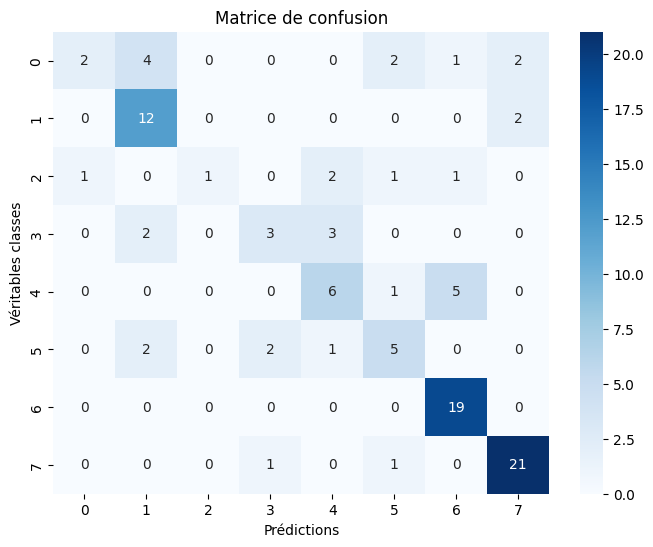

In [187]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculer la matrice de confusion sur l'ensemble de test
y_test_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_test_pred)

# Affichage de la matrice de confusion sous forme de heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title("Matrice de confusion")
plt.xlabel("Prédictions")
plt.ylabel("Véritables classes")
plt.show()


In [188]:
import joblib

# Enregistrer le modèle dans un fichier
joblib.dump(model, 'model.pkl')


['model.pkl']

In [189]:
# Charger le modèle depuis le fichier
model = joblib.load('model.pkl')

# Utiliser le modèle pour faire des prédictions
y_pred = model.predict(X_test)


